<a href="https://colab.research.google.com/github/N-k-Siam/210113_Decision_Tree_Classification/blob/main/210113_Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data from GitHub

In [ ]:
import pandas as pd
import numpy as np

github_url = "https://raw.githubusercontent.com/N-k-Siam/210113_Decision_Tree_Classification/main/heart.csv"

df = pd.read_csv(github_url)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Separate features (X) and target (y)

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

# Target distribution

In [ ]:
target_names = ['No Disease', 'Disease']
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"\nClass balance:")
for i, name in enumerate(target_names):
    count = (y == i).sum()
    percentage = (count / len(y)) * 100
    print(f"  {name}: {count} ({percentage:.2f}%)")


Target distribution:
target
1    526
0    499
Name: count, dtype: int64

Class balance:
  No Disease: 499 (48.68%)
  Disease: 526 (51.32%)


#Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
X_train.shape[0]

820

In [ ]:
X_test.shape[0]

205

# CART Implementation (Gini Criterion)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

param_grid_cart = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)
grid_search_cart = GridSearchCV(
    cart_model,
    param_grid_cart,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)


grid_search_cart.fit(X_train, y_train)

print(f"CART Grid Search Complete!")
print(f"Best Parameters for CART:")
for param, value in grid_search_cart.best_params_.items():
    print(f"  {param}: {value}")
print(f"Best CV accuracy (CART): {grid_search_cart.best_score_:.4f}")

Fitting 5 folds for each of 112 candidates, totalling 560 fits
CART Grid Search Complete!
Best Parameters for CART:
  max_depth: 15
  min_samples_leaf: 1
  min_samples_split: 2
Best CV accuracy (CART): 0.9866


In [ ]:
best_cart = grid_search_cart.best_estimator_
best_cart.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

# ID3 Implementation (Entropy Criterion)

In [ ]:
param_grid_id3 = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
grid_search_id3 = GridSearchCV(
    id3_model,
    param_grid_id3,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)


grid_search_id3.fit(X_train, y_train)

print(f"ID3 Grid Search Complete!")
print(f"Best Parameters for ID3:")
for param, value in grid_search_id3.best_params_.items():
    print(f"  {param}: {value}")
print(f"Best CV accuracy (ID3): {grid_search_id3.best_score_:.4f}")


Fitting 5 folds for each of 112 candidates, totalling 560 fits
ID3 Grid Search Complete!
Best Parameters for ID3:
  max_depth: 15
  min_samples_leaf: 1
  min_samples_split: 2
Best CV accuracy (ID3): 0.9890


In [ ]:
best_id3 = grid_search_id3.best_estimator_
best_id3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=42)

# Evaluation Metrics - CART


In [ ]:
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             auc, roc_auc_score, accuracy_score, precision_score,
                             recall_score, f1_score)

y_pred_cart = best_cart.predict(X_test)
y_pred_proba_cart = best_cart.predict_proba(X_test)[:, 1]

cart_accuracy = accuracy_score(y_test, y_pred_cart)
cart_precision = precision_score(y_test, y_pred_cart)
cart_recall = recall_score(y_test, y_pred_cart)
cart_f1 = f1_score(y_test, y_pred_cart)
cart_auc = roc_auc_score(y_test, y_pred_proba_cart)

print("\n--- CART (Gini) Metrics ---")
print(f"Accuracy:  {cart_accuracy:.4f}")
print(f"Precision: {cart_precision:.4f}")
print(f"Recall:    {cart_recall:.4f}")
print(f"F1-Score:  {cart_f1:.4f}")
print(f"AUC:       {cart_auc:.4f}")


--- CART (Gini) Metrics ---
Accuracy:  0.9854
Precision: 1.0000
Recall:    0.9714
F1-Score:  0.9855
AUC:       0.9857


# Evaluation Metrics - ID3

In [ ]:
y_pred_id3 = best_id3.predict(X_test)
y_pred_proba_id3 = best_id3.predict_proba(X_test)[:, 1]

id3_accuracy = accuracy_score(y_test, y_pred_id3)
id3_precision = precision_score(y_test, y_pred_id3)
id3_recall = recall_score(y_test, y_pred_id3)
id3_f1 = f1_score(y_test, y_pred_id3)
id3_auc = roc_auc_score(y_test, y_pred_proba_id3)

print("\n--- ID3 (Entropy) Metrics ---")
print(f"Accuracy:  {id3_accuracy:.4f}")
print(f"Precision: {id3_precision:.4f}")
print(f"Recall:    {id3_recall:.4f}")
print(f"F1-Score:  {id3_f1:.4f}")
print(f"AUC:       {id3_auc:.4f}")


--- ID3 (Entropy) Metrics ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000
AUC:       1.0000


# Confusion Matrix

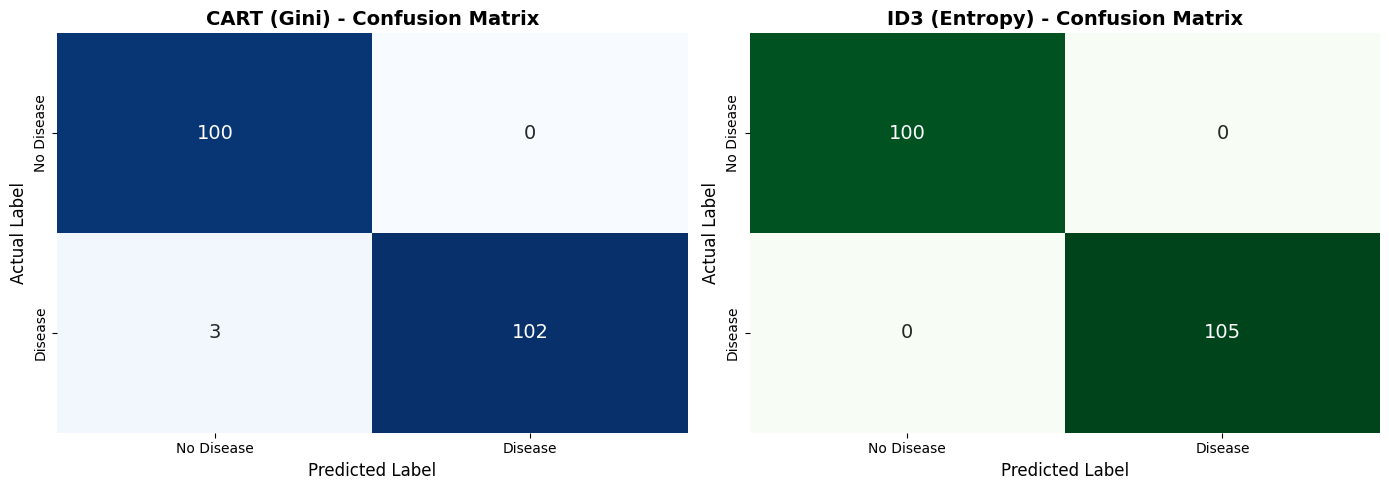

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# CART Confusion Matrix
cm_cart = confusion_matrix(y_test, y_pred_cart)
sns.heatmap(cm_cart, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=target_names, yticklabels=target_names,
            annot_kws={'size': 14}, ax=axes[0])
axes[0].set_title('CART (Gini) - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# ID3 Confusion Matrix
cm_id3 = confusion_matrix(y_test, y_pred_id3)
sns.heatmap(cm_id3, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=target_names, yticklabels=target_names,
            annot_kws={'size': 14}, ax=axes[1])
axes[1].set_title('ID3 (Entropy) - Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Actual Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.savefig('2_Confusion_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()


#ROC Curve

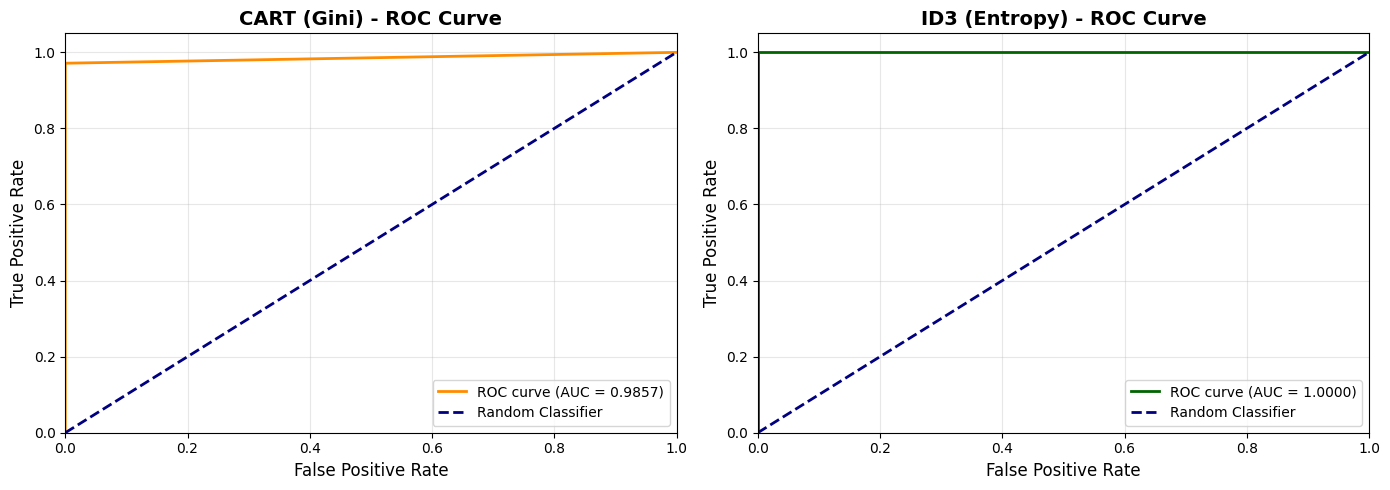

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# CART ROC Curve
fpr_cart, tpr_cart, _ = roc_curve(y_test, y_pred_proba_cart)
roc_auc_cart = auc(fpr_cart, tpr_cart)
axes[0].plot(fpr_cart, tpr_cart, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc_cart:.4f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
             label='Random Classifier')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate', fontsize=12)
axes[0].set_ylabel('True Positive Rate', fontsize=12)
axes[0].set_title('CART (Gini) - ROC Curve', fontsize=14, fontweight='bold')
axes[0].legend(loc="lower right")
axes[0].grid(alpha=0.3)

# ID3 ROC Curve
fpr_id3, tpr_id3, _ = roc_curve(y_test, y_pred_proba_id3)
roc_auc_id3 = auc(fpr_id3, tpr_id3)
axes[1].plot(fpr_id3, tpr_id3, color='darkgreen', lw=2,
             label=f'ROC curve (AUC = {roc_auc_id3:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
             label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title('ID3 (Entropy) - ROC Curve', fontsize=14, fontweight='bold')
axes[1].legend(loc="lower right")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('3_ROC_Curve.png', dpi=300, bbox_inches='tight')
plt.show()

#2D Decision Boundary Visualization

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/tmp/ipython-input-59295432.py:48: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  axes[0].legend(*scatter1.legend_elements(), title="Classes", labels=target_names)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/tmp/ipython-input-59295432.py:60: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  axes[1].legend(*scatter2.legend_elements(), title="Classes", labels=target_names)


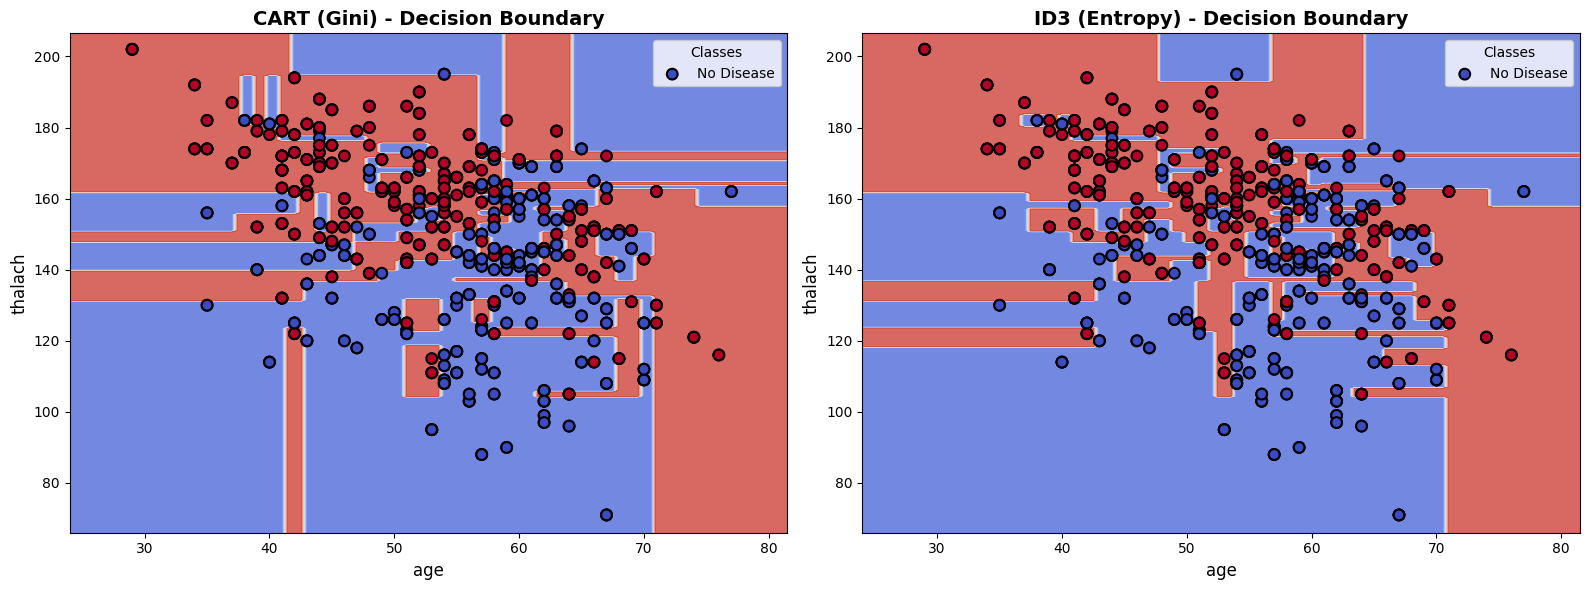

In [ ]:
import matplotlib.pyplot as plt

features_2D = ['age', 'thalach']
X_2D = X[features_2D]


X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(
    X_2D, y, test_size=0.2, random_state=42, stratify=y
)


cart_2D = DecisionTreeClassifier(
    criterion='gini',
    max_depth=best_cart.max_depth,
    min_samples_split=best_cart.min_samples_split,
    random_state=42
)
cart_2D.fit(X_train_2D, y_train_2D)

id3_2D = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=best_id3.max_depth,
    min_samples_split=best_id3.min_samples_split,
    random_state=42
)
id3_2D.fit(X_train_2D, y_train_2D)


h = 0.5
x_min, x_max = X_train_2D.iloc[:, 0].min() - 5, X_train_2D.iloc[:, 0].max() + 5
y_min, y_max = X_train_2D.iloc[:, 1].min() - 5, X_train_2D.iloc[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


Z_cart = cart_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z_cart = Z_cart.reshape(xx.shape)
axes[0].contourf(xx, yy, Z_cart, alpha=0.8, cmap=plt.cm.coolwarm)
scatter1 = axes[0].scatter(X_train_2D.iloc[:, 0], X_train_2D.iloc[:, 1],
                          c=y_train_2D, cmap=plt.cm.coolwarm, edgecolors='k',
                          marker='o', s=60, linewidth=1.5)
axes[0].set_title('CART (Gini) - Decision Boundary', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'{features_2D[0]}', fontsize=12)
axes[0].set_ylabel(f'{features_2D[1]}', fontsize=12)
axes[0].legend(*scatter1.legend_elements(), title="Classes", labels=target_names)


Z_id3 = id3_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z_id3 = Z_id3.reshape(xx.shape)
axes[1].contourf(xx, yy, Z_id3, alpha=0.8, cmap=plt.cm.coolwarm)
scatter2 = axes[1].scatter(X_train_2D.iloc[:, 0], X_train_2D.iloc[:, 1],
                          c=y_train_2D, cmap=plt.cm.coolwarm, edgecolors='k',
                          marker='o', s=60, linewidth=1.5)
axes[1].set_title('ID3 (Entropy) - Decision Boundary', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'{features_2D[0]}', fontsize=12)
axes[1].set_ylabel(f'{features_2D[1]}', fontsize=12)
axes[1].legend(*scatter2.legend_elements(), title="Classes", labels=target_names)

plt.tight_layout()
plt.savefig('1_Decision_Boundary.png', dpi=300, bbox_inches='tight')
plt.show()

#Evaluation Metrics Comparison

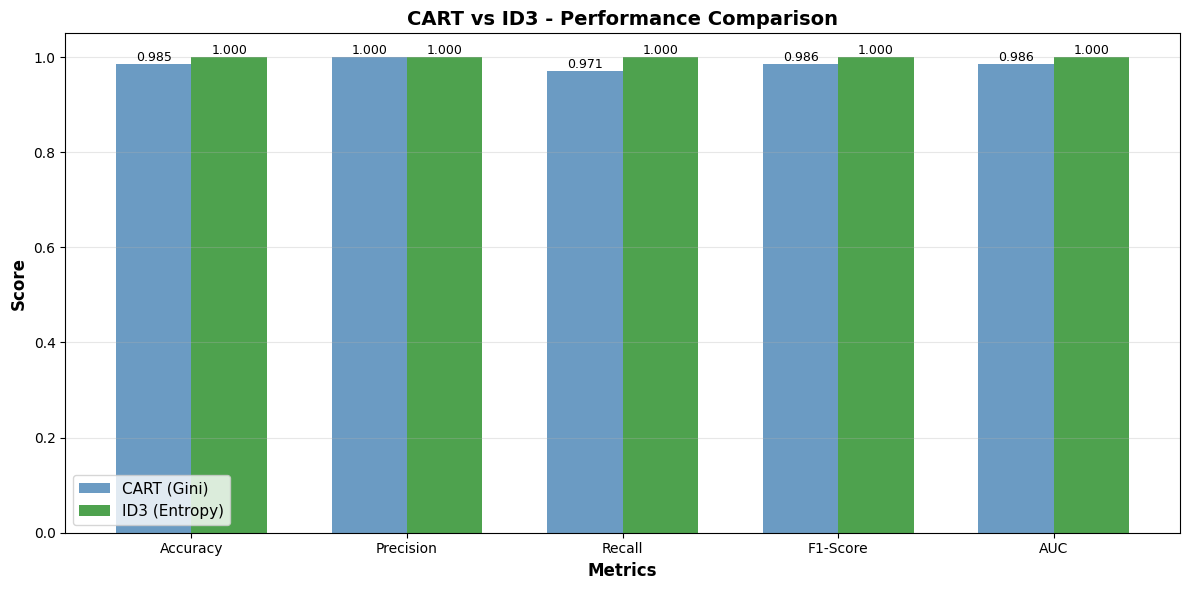

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
cart_scores = [cart_accuracy, cart_precision, cart_recall, cart_f1, cart_auc]
id3_scores = [id3_accuracy, id3_precision, id3_recall, id3_f1, id3_auc]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, cart_scores, width, label='CART (Gini)',
               color='steelblue', alpha=0.8)
bars2 = ax.bar(x + width/2, id3_scores, width, label='ID3 (Entropy)',
               color='forestgreen', alpha=0.8)

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('CART vs ID3 - Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('4_Evaluation_Metrics.png', dpi=300, bbox_inches='tight')
plt.show()


#Decision Tree Structure

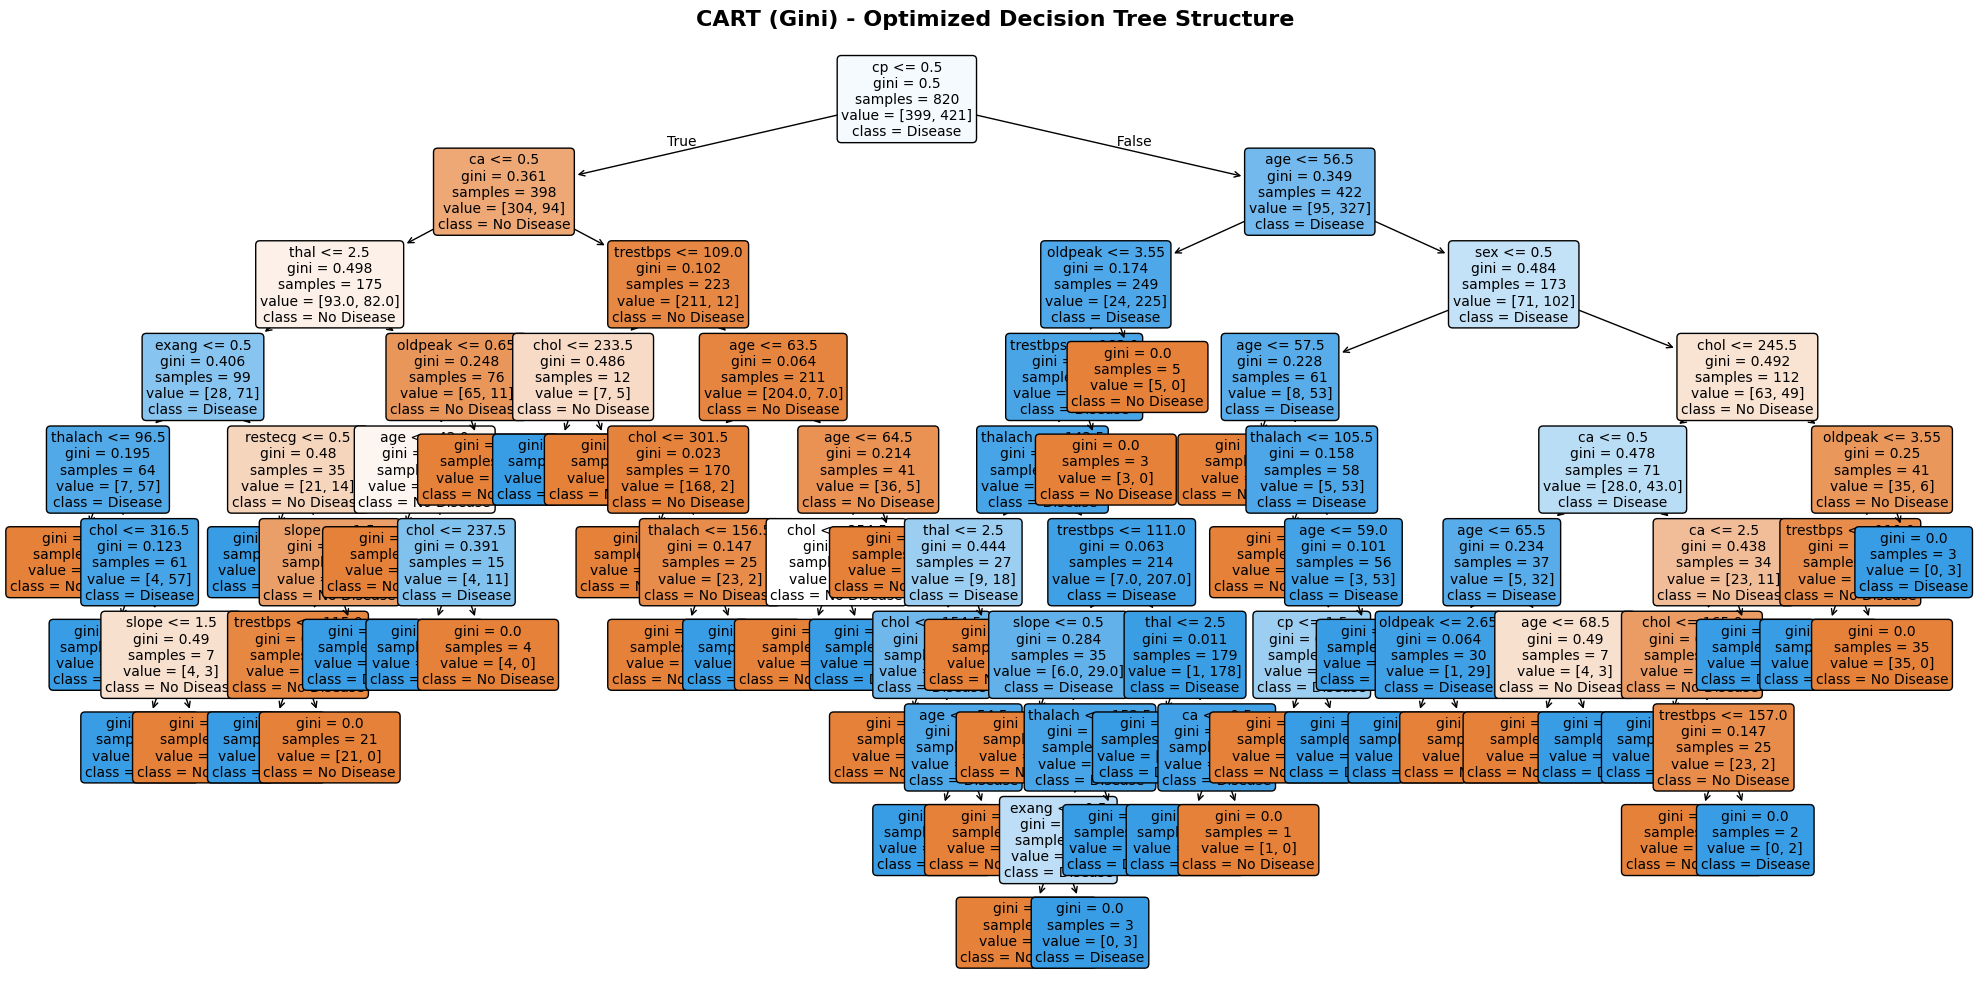

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(best_cart,
          feature_names=X.columns,
          class_names=target_names,
          filled=True,
          rounded=True,
          fontsize=10,
          ax=ax)
ax.set_title('CART (Gini) - Optimized Decision Tree Structure',
             fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('5_decisionTree.png', dpi=300, bbox_inches='tight')
plt.show()